<a href="https://colab.research.google.com/github/s769/op_on_sg/blob/master/OP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports and Data

In [0]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [1]:
#imports and loading data
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
!pip install matlab
import matlab
# filepath = '/content/gdrive/My\ Drive/Colab\ Notebooks/'
# folder = 'ENTER FOLDER HERE'
# filepath += folder
# !cp  /content/gdrive/My\ Drive/Colab\ Notebooks/DATA FILE /content/DATA FILE
!mkdir images

  Stored in directory: /root/.cache/pip/wheels/fe/ea/9a/2d99da71ec929e083a47e62aa641d25c95cb0cb32fb288b817
Successfully built matlab


In [0]:
def array(*args, **kwargs):
    kwargs.setdefault("dtype", np.float32)
    return np.array(*args, **kwargs)
  
def mem(func):
    cache = dict()

    def memoized_func(*args):
        if args in cache:
            return cache[args]
        result = func(*args)
        cache[args] = result
        return result

    return memoized_func

@mem
def a(j):
  if j==0: return 1
  if j==1: return 1/6
  res = 0
  for l in range(1, j):
    res += a(j-l)*a(l)
  return res*4/(5**j - 5)


@mem
def b(j):
  if j==0: return -1/2
  res = 0
  for l in range(j):
    res += (3*5**(j-l) - 5**(l+1) + 6)*a(j-l)*b(l)
  return res*2/(15*(5**j - 1))

@mem
def g(j):
  return 3*a(j+1)

@mem
def n(j):
  if j==0: return 0
  res = a(j)*(5**j + 1)/2
  for l in range(j):
    res += 2*n(l)*b(j-l)
  return res

@mem
def ap(j):
  if j==0: return 1/2
  return a(j)

In [0]:


# def inner_j1k1(j, k, energy=False):
#   if energy:
#     res = 2*a(k)*n(j)
#     ms = min(j, k)
#     s1 = 0
#     for l in range(j-ms, j+1):
#       s1 += a(j-l)*n(k+l+1) - a(k+l+1)*n(j-l)
#     s2 = 0
#     for l in range(j-ms-1, j):
#       s2 += a(j-l-1)*n(k+l+1) - a(k+l+1)*n(j-l-1)

#     return res + 2*(s1-s2)
  

#   ms = min(j, k)
#   s1 = 0
#   for l in range(j-ms, j+1):
#     s1 += a(j-l)*n(k+l+1) - a(k+l+1)*n(j-l)
#   s2 = 0
#   for l in range(j-ms-1, j):
#     s2 += a(j-l-1)*n(k+l) - a(k+l)*n(j-l-1)
  
#   return 2*(s1+s2)


def inner0_j1k1(j, k):
  ms = min(j, k)
  s1 = 0
  for l in range(j-ms, j+1):
    s1 += a(j-l)*n(k+l+1) - a(k+l+1)*n(j-l)
  return 2*s1

# def inner_j2k2(j, k, energy=False):
#   if energy:
#     res = -2*b(k)*a(j)
#     s1 = 0
#     ms = min(j, k)
#     for l in range(j-ms, j+1):
#       s1 += b(j-l)*a(k+l+1) - b(k+l+1)*a(j-l)
#     s2 = 0
#     for l in range(j-ms-1, j):
#       s2 += b(j-l-1)*a(k+l+1) - b(k+l+1)*a(j-l-1)

#     return res - 2*(s1-s2)
  
#   ms = min(j, k)
#   s1 = 0
#   for l in range(j-ms, j+1):
#     s1 += b(j-l)*a(k+l+1) - b(k+l+1)*a(j-l)
#   s2 = 0
#   for l in range(j-ms-1, j):
#     s2 += b(j-l-1)*a(k+l) - b(k+l)*a(j-l-1)
  
#   return -2*(s1+s2)

def inner0_j2k2(j, k):
  ms = min(j, k)
  s1 = 0
  for l in range(j-ms, j+1):
    s1 += b(j-l)*a(k+l+1) - b(k+l+1)*ap(j-l)
  return -2*s1

# def inner_j3k3(j, k, energy=False):
#   if energy:
#     res = 6*g(k)*n(k)
#     ms = min(j, k)
#     s1 = 0
#     for l in range(j-ms, j+1):
#       s1 += a(j-l+1)*n(k+l+2) - a(k+l+2)*n(j-l+1)
#     s2 = 0
#     for l in range(j-ms-1, j):
#       s2 += a(j-l)*n(k+l+2) - a(k+l+2)*n(j-l)

#     return res + 18*(s1-s2)
  
#   ms = min(j, k)
#   s1 = 0
#   for l in range(j-ms, j+1):
#     s1 += a(j-l+1)*n(k+l+2) - a(k+l+2)*n(j-l+1)
#   s2 = 0
#   for l in range(j-ms-1, j):
#     s2 += a(j-l)*n(k+l+1) - a(k+l+1)*n(j-l)
  
#   return 18*(s1+s2)

def inner0_j3k3(j, k):
  ms = min(j, k)
  s1 = 0
  for l in range(j-ms, j+1):
    s1 += a(j-l+1)*n(k+l+2) - a(k+l+2)*n(j-l+1)
  return 18*s1

# def inner_j1k2(j, k, energy=False):
#   if energy:
#     res = 2*b(k)*n(k)
#     s1 = 0
#     for l in range(j+1):
#       s1 += a(j-l)*a(k+1+l) + b(k+1+l)*n(j-l)
#     s2 = 0  
#     for l in range(j):
#       s2 += a(j-l-1)*a(k+1+l) + b(k+1+l)*n(j-l-1)

#     return res - 2*(s1-s2)
  
#   s1 = 0
#   for l in range(j+1):
#     s1 += a(j-l)*a(k+l+1) + b(k+l+1)*n(j-l)
#   s2 = 0
#   for l in range(j):
#     s2 += a(j-l-1)*a(k+l) + b(k+l)*n(j-l-1)
  
#   return -2*(s1+s2)

def inner0_j1k2(j, k):
  s1 = 0
  for l in range(j+1):
    s1 += a(j-l)*a(k+l+1) + b(k+l+1)*n(j-l)
  return -2*s1
  



inner0_j1k3 = lambda j, k: 0
inner0_j2k3 = lambda j, k: 0

inner_dict = {(1,1):inner0_j1k1, (2,2):inner0_j2k2, (3,3):inner0_j3k3,\
             (1,2):inner0_j1k2, (1,3):inner0_j1k3, (2,3): inner0_j2k3}


vals_dict = {1:a, 2:b, 3:g}

dnpj2 = lambda j: -a(j)
dnpj3 = lambda j: 3*n(j+1)

norm_dict = {1:n, 2:dnpj2, 3:dnpj3}



In [5]:


class Polynomial:
  
  GM = None
  lam = 10

    
  def has_GM(n):
    return (not Polynomial.GM is None) and\
        Polynomial.GM['sob'].shape[0] >= n
  
  def __init__(self, coefs, j, k, inner='sob'):
    if not len(coefs) == 3*j+3: 
      ad = np.zeros(3*j+3 - len(coefs))
      coefs = np.append(coefs, ad)
    self.coefs = coefs
    self.j = j
    self.k = k
    self.inner = inner
    
  def __add__(self, other):
    return Polynomial(self.coefs+other.coefs, self.j)


  def basis_inner(j, i, k, ip, inner='sob'):
    try:
      inner_func = inner_dict[(i, ip)]
    except KeyError:
      inner_func = inner_dict[(ip, i)]
    return inner_func(j, k) + Polynomial.lam*inner_func(j-1, k-1)\
      if inner == 'sob' else inner_func(j,k)
  
  def slow_inner(arr1, arr2, inner='sob'):
    res = 0
    for ind1 in range(len(arr1)):
      for ind2 in range(len(arr2)):
        if arr1[ind1] == 0 or arr2[ind2] == 0: continue
        j = int(np.floor(ind1/3))
        k = int(np.floor(ind2/3))
        i = int(ind1%3 + 1)
        ip = int(ind2%3 + 1)
        res += \
        arr1[ind1]*arr2[ind2]\
        *Polynomial.basis_inner(j, i, k, ip, inner)
        
    return res
  
  def build_GM(n):
    if Polynomial.has_GM(n): return
    GM = {'sob':np.zeros((n,n)), 'leg':np.zeros((n,n))}
    
    for inner in ['sob', 'leg']:
      for ind1 in range(n):
        for ind2 in range(n):
          if ind1 <= ind2:
            j = int(np.floor(ind1/3))
            k = int(np.floor(ind2/3))
            i = int(ind1%3 + 1)
            ip = int(ind2%3 + 1)
            GM[inner][ind1, ind2] = \
              Polynomial.basis_inner(j, i, k, ip, inner)
      GM[inner] = GM[inner] + GM[inner].T - np.diag(GM[inner].diagonal())
    
    Polynomial.GM = GM
    return
  
  def build_condensed_GM(n, i):
    GM = {'sob':np.zeros((n,n)), 'leg':np.zeros((n,n))}
    for inner in ['sob', 'leg']:
      for ind1 in range(n):
        for ind2 in range(n):
          if ind1 <= ind2:
            GM[inner][ind1, ind2] = \
              Polynomial.basis_inner(ind1, i, ind2, i, inner)
            
      GM[inner] = GM[inner] + GM[inner].T - np.diag(GM[inner].diagonal())
      
    Polynomial.GM = GM
  
  def fast_inner(arr1, arr2, GM):
    return arr1.T @ GM @ arr2
  
  
  def pad(obj1, obj2):
    if len(obj1.coefs) > len(obj2.coefs):
      arr1 = obj1.coefs
      arr2 = np.append(obj2.coefs,\
                       np.zeros(len(obj1.coefs)-len(obj2.coefs)))
    elif len(obj1.coefs) < len(obj2.coefs):
      arr1 = np.append(obj1.coefs,\
                       np.zeros(len(obj2.coefs)-len(obj1.coefs)))
      arr2 = obj2.coefs
    else:
      arr1 = obj1.coefs
      arr2 = obj2.coefs
      
    return arr1, arr2
  
  def inner(self, other):
    arr1, arr2 = Polynomial.pad(self, other)
    
    n = len(arr1)
    GM_status = Polynomial.has_GM(n)
    print(GM_status)
    if GM_status:
      print('Using Fast Inner Product')
      GM = Polynomial.GM[self.inner][:n, :n]
      return Polynomial.fast_inner(arr1, arr2, GM)
    print('Using Slow Inner Product')
    return Polynomial.slow_inner(arr1, arr2, self.inner)
  
  def norm(self):
    return np.sqrt(inner(self, self))
  
  def get_condensed_coefs(self):
    return self.coefs[self.k-1::3]
  
  def value(self, i=1):
    ccoefs = self.get_condensed_coefs()
    valarr = array([vals_dict[self.k](m) for m in range(j+1)])
    res = ccoefs.dot(valarr)
    if i == 0:
      return np.sum(ccoefs) if self.k == 0 else 0
    if i == 1:
      return res
    if i == 2:
      return res if self.k == 0 or self.k == 1 else -res
  
  def dnvalue(self, i=1):
    ccoefs = self.get_condensed_coefs()
    dnarr = array([norm_dict[self.k](m) for m in range(j+1)])
    res = ccoefs.dot(dnarr)
    if i == 0:
      return np.sum(ccoefs) if self.k == 1 else 0
    if i == 1:
      return res
    if i == 2:
      return res if self.k == 0 or self.k == 1 else -res
  
  def get_condensed_GM(k, inner='sob'):
    GM = Polynomial.GM[inner]
    return GM[k-1::3, k-1::3]
      
    
    
    
import scipy.io

def generate_op(n, k, normalized=True, inner='sob'):
  Polynomial.build_condensed_GM(n+1, k)
#   basis_mat = np.zeros((n+1, 3*n+3))
  
#   for i in range(n+1):
#     basis_mat[i, 3*i + k - 1] = 1
  basis_mat = np.eye(n+1)
  #o_basis_mat = np.zeros((n+1, 3*n+3))
  o_basis_mat = np.zeros((n+1, n+1))
  
  o_basis_mat[0] = basis_mat[0]
  for r in range(1, n+1):
    res = np.zeros(n+1)
    u_r = basis_mat[r]
    for i in range(r):
      v_i = o_basis_mat[i]
      le = len(u_r)
      GM = Polynomial.GM[inner][:le, :le]
      proj = Polynomial.fast_inner(u_r, v_i, GM)
      norm = Polynomial.fast_inner(v_i, v_i, GM)
      res += proj/norm*v_i
    o_basis_mat[r] = basis_mat[r] - res
    
  if normalized:
    for i in range(n+1):
      norm = Polynomial.fast_inner(o_basis_mat[i], o_basis_mat[i],
                                  GM)
      o_basis_mat[i] /= np.sqrt(norm)
  return o_basis_mat#, o_basis_mat[:, k-1::3]
  
j = 15
k = 3
ops = generate_op(j,k,1)
#arr1 = ops[2]
# arr2 = ops[3]
# Polynomial.fast_inner(arr1, arr2, Polynomial.GM)]
#print(ops)


# poly_arr = np.array([Polynomial(r, j, k) for r in ops[0]])

# for k in range(j):
#   sn1 = poly_arr[k+1].value()
#   sn = poly_arr[k].value()
#   dsn1 = poly_arr[k+1].dnvalue()
#   dsn = poly_arr[k].dnvalue()
#   print(sn1*dsn - sn*dsn1)
#print(repr(ops))

scipy.io.savemat('coefs.mat', dict(ops=ops))
ops[2]
    
    
   

array([ 6.36446182e-02, -5.00620792e+00,  2.45759742e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

###Checking behavior of d_n(f_n(q_0))

##Symmetric OPs

In [0]:
def pnj1(nn, j, i):
  return int(j == 0) if i == nn else a(j)

def d_pnj1(nn, j, i):
  return 0 if i == nn else n(j)


def inner_pnj1pmk1(nn, j, m, k):
  if nn == m: return inner0_j1k1(j,k)
  res = 0
  for l in range(j+1):
    s1 = 0
    for i in range(3):
      s1 += pnj1(nn, j-l, i)*d_pnj1(m, k+l+1, i)\
        -pnj1(m, k+l+1, i)*d_pnj1(nn, j-l, i)
    res += s1
  return res


def inner_rjrk(j,k, lam = 1):
  res = 0
  for nn in range(3):
    for m in range(3):
      res += inner_pnj1pmk1(nn, j, m, k) \
      + lam*inner_pnj1pmk1(nn, j-1, m, k-1)
  return res






def symm_inner(arr1, arr2, SGM):
  return arr1.T @ SGM @ arr2

def generate_symm_ops(n, normalized=False):
  SGM = np.zeros((n+1, n+1))

  for ind1 in range(n+1):
    for ind2 in range(n+1):
      if ind1 <= ind2:
        SGM[ind1, ind2] = inner_rjrk(ind1, ind2)

  SGM = SGM + SGM.T - \
      np.diag(SGM.diagonal())
  print(repr(np.linalg.eig(SGM)))
  basis_mat = np.eye(n+1)
  o_basis_mat = np.zeros((n+1, n+1))
  
  o_basis_mat[0] = basis_mat[0]
  for r in range(1, n+1):
    res = np.zeros(n+1)
    u_r = basis_mat[r]
    for i in range(r):
      v_i = o_basis_mat[i]
      le = len(u_r)
      proj = symm_inner(u_r, v_i, SGM)
      norm = symm_inner(v_i, v_i, SGM)
      res += proj/norm*v_i
    o_basis_mat[r] = basis_mat[r] - res
    
  if normalized:
    for i in range(n+1):
      norm = symm_inner(o_basis_mat[i], o_basis_mat[i],
                                  SGM)
      print(o_basis_mat[i])
      print(norm)
      o_basis_mat[i] /= np.sqrt(norm)
  
  return o_basis_mat, SGM

num = 6
sops , SGM = generate_symm_ops(num, 1)
sops
arr1 = sops[1]
arr2 = sops[2]
symm_inner(arr1, arr2, SGM)

(array([ 9.52917864e+00,  8.52825099e+00,  1.85062761e-03,  5.83069035e-09,
        1.34243234e-15,  9.97567574e-23, -6.51606742e-29]), array([[ 6.86553242e-01,  7.27076016e-01, -2.26017757e-03,
        -6.99411023e-05, -2.45112922e-06,  8.90170658e-08,
         3.22142709e-09],
       [ 7.26043924e-01, -6.85406107e-01,  5.54539772e-02,
         1.88176129e-03,  6.64185682e-05, -2.41347672e-06,
        -8.73464935e-08],
       [ 3.87884264e-02, -3.97313797e-02, -9.97269339e-01,
        -4.86572126e-02, -1.79205451e-03,  6.54031530e-05,
         2.36820720e-06],
       [ 5.70242583e-04, -5.93769398e-04, -4.87172300e-02,
         9.97709804e-01,  4.68826088e-02, -1.76555484e-03,
        -6.41814232e-05],
       [ 3.77103684e-06, -3.95045311e-06, -4.94113851e-04,
         4.69457935e-02, -9.97821102e-01,  4.63237717e-02,
         1.73355867e-03],
       [ 1.36318354e-08, -1.43199879e-08, -2.23935599e-06,
         4.10809446e-04, -4.63864825e-02, -9.97880152e-01,
        -4.56435084e-02],


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in sqrt


-4.440892098500626e-16

#Plotting

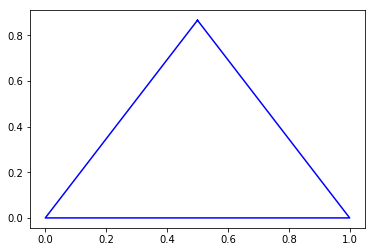

In [0]:
import itertools
import matplotlib.transforms as trans


q0 = np.array([0.5, np.sqrt(3)/2])
q1 = np.array([0,0])
q2 = np.array([1,0])

q_dict = {0:q0, 1:q1, 2:q2}

fi = lambda x, i: 1/2*(x-q_dict[i]) + q_dict[i]

f_dict = {0:lambda x:fi(x, 0), 1:lambda x:fi(x, 1), 2:lambda x:fi(x, 2)}

V0 = np.array([q0,q1,q2, q0])

def grouper(n, iterable, fillvalue=None):
    "grouper(3, 'ABCDEFG', 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return itertools.zip_longest(fillvalue=fillvalue, *args)

def generate_vertices(m):
  words = list(itertools.product(range(3), repeat=m))
  V = []
  for q in V0:
    for word in words:
      point = q
      for letter in word:
        point = f_dict[letter](point)
      V.append(point)
  return np.array(V)


V = generate_vertices(2)

# for cell in grouper(3, V):
#   cell = np.array(cell)
#   cell = np.vstack((cell, cell[0]))
#   plt.plot(cell[:, 0], cell[:, 1], 'b')
#   plt.plot(V[i:i+2,0], V[i:i+2, 1], 'b')

plt.plot(V0[:,0], V0[:,1], 'b')
plt.show()

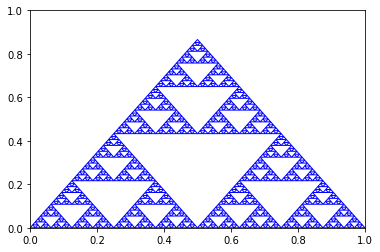

In [0]:
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D

def get_image():
    return np.array([q0,q1,q2, q0])

  
fig = plt.figure()
ax = fig.add_subplot(111)

def transform(i, ax):
  qi = q_dict[i]
  t1 = trans.Affine2D().translate(-qi[0], -qi[1])
  t2 = trans.Affine2D().scale(0.5, 0.5)
  t3 = trans.Affine2D().translate(qi[0], qi[1])
  return t1 + t2 + t3

def plot_sg(m, ax):
  words = list(itertools.product(range(3), repeat=m))
  for word in words:
    polygon = patches.Polygon([q0,q1,q2], color="blue", fill=0)
    t = trans.Affine2D().rotate_deg(0)
    for letter in word:
      t += transform(letter, ax)
    t += ax.transData
    polygon.set_transform(t)
    ax.add_patch(polygon)
  plt.show()

plot_sg(6, ax)

#Save Code and Images

In [0]:
!zip -r images.zip images

In [0]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [0]:
# !cp /content/gdrive/My\ Drive/Colab\ Notebooks/ENTER FILENAME
# !jupyter nbconvert --to PDF "Project 3.ipynb"